In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import ipywidgets as widgets
from IPython.display import display, Markdown
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-whitegrid')
np.random.seed(42)

def print_insight(text):
    display(Markdown(f"### 💡 {text}"))

# Understanding p-Values Through Industry Financial Profile Analysis 📊

# Introduction - What is a p-Value?
## The Coin Flip Intuition

In [2]:
# Scenario: You suspect a coin is unfair
# You flip it 100 times and get 60 heads

n_flips = 100
observed_heads = 60

# The question: If the coin IS fair (p=0.5), how likely is it to get 60 or more heads?
print(f"Observed: {observed_heads} heads in {n_flips} flips")
print(f"Expected if fair: {n_flips * 0.5:.0f} heads")
print(f"Deviation: {observed_heads - n_flips * 0.5:.0f} more heads than expected")

# Calculate the probability using binomial distribution
p_value = 1 - stats.binom.cdf(observed_heads - 1, n_flips, 0.5)
print(f"\np-value: {p_value:.6f}")
print(f"Interpretation: If the coin is fair, there's only a {p_value*100:.4f}% chance")
print(f"               of getting {observed_heads} or more heads in {n_flips} flips")

Observed: 60 heads in 100 flips
Expected if fair: 50 heads
Deviation: 10 more heads than expected

p-value: 0.028444
Interpretation: If the coin is fair, there's only a 2.8444% chance
               of getting 60 or more heads in 100 flips


## **Important:** We assume that data is normally distributed!

# P-Value Calculation Guide

**P-value** = Probability of observing a test statistic as extreme or more extreme than calculated, assuming H₀ is true.

---

## Z-Score (σ known)

**Formula:** `Z = (x̄ - μ₀) / (σ/√n)`

**P-values:**
- One-tailed (right): `p = 1 - Φ(z)`
- One-tailed (left): `p = Φ(z)`
- Two-tailed: `p = 2 × (1 - Φ(|z|))`

*Φ = standard normal CDF*

---

## T-Score (σ unknown)

**Formula:** `t = (x̄ - μ₀) / (s/√n)`  
**Degrees of freedom:** `df = n - 1`

**P-values:**
- One-tailed (right): `p = 1 - T(t, df)`
- One-tailed (left): `p = T(t, df)`
- Two-tailed: `p = 2 × (1 - T(|t|, df))`

*T = t-distribution CDF*

---

## Quick Reference

| Condition | Use | Test Statistic |
|-----------|-----|----------------|
| σ known | Z-test | Z = (x̄ - μ₀)/(σ/√n) |
| σ unknown | T-test | t = (x̄ - μ₀)/(s/√n) |

**Interpretation:**
- p < 0.05 → Reject H₀
- p ≥ 0.05 → Fail to reject H₀

## Visualizing the p-Value Concept

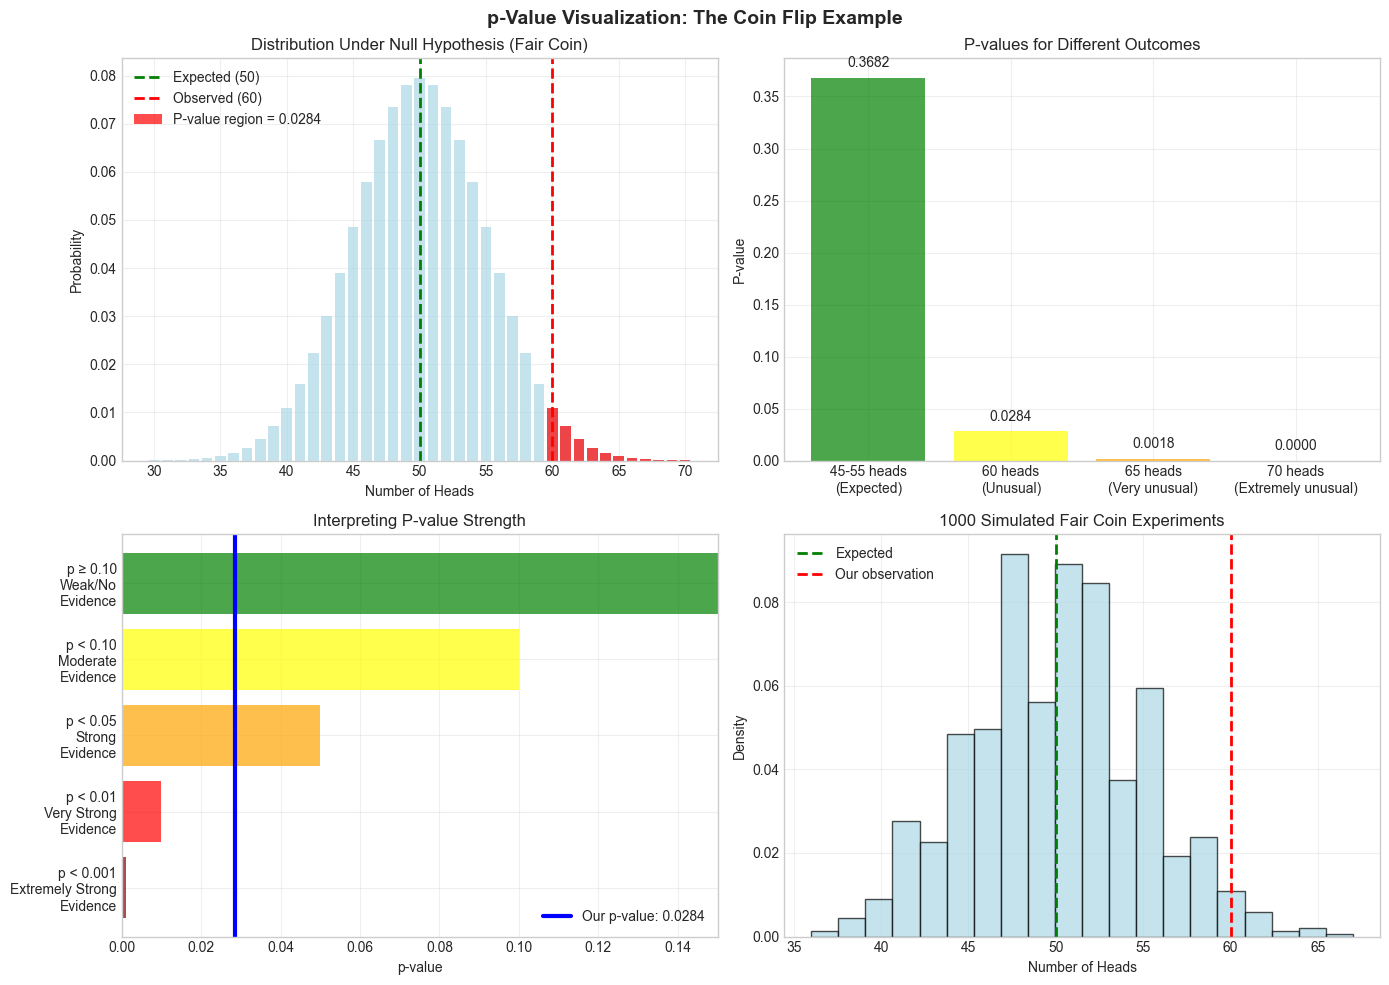

### 💡 The p-value (0.0284) tells us: If the coin were fair, we'd rarely see 60 or more heads. This is suspicious!

In [3]:
# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. The null hypothesis distribution
ax1 = axes[0, 0]
x = np.arange(30, 71)
y = stats.binom.pmf(x, n_flips, 0.5)
ax1.bar(x, y, color='lightblue', alpha=0.7)
ax1.bar(x[x >= observed_heads], y[x >= observed_heads], color='red', alpha=0.7, 
        label=f'P-value region = {p_value:.4f}')
ax1.axvline(50, color='green', linestyle='--', linewidth=2, label='Expected (50)')
ax1.axvline(observed_heads, color='red', linestyle='--', linewidth=2, label=f'Observed ({observed_heads})')
ax1.set_xlabel('Number of Heads')
ax1.set_ylabel('Probability')
ax1.set_title('Distribution Under Null Hypothesis (Fair Coin)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. The concept of "as extreme or more extreme"
ax2 = axes[0, 1]
scenarios = ['45-55 heads\n(Expected)', '60 heads\n(Unusual)', 
             '65 heads\n(Very unusual)', '70 heads\n(Extremely unusual)']
p_values_examples = [
    1 - stats.binom.cdf(54, n_flips, 0.5) + stats.binom.cdf(45, n_flips, 0.5),
    1 - stats.binom.cdf(59, n_flips, 0.5),
    1 - stats.binom.cdf(64, n_flips, 0.5),
    1 - stats.binom.cdf(69, n_flips, 0.5)
]
colors_bar = ['green', 'yellow', 'orange', 'red']
bars = ax2.bar(scenarios, p_values_examples, color=colors_bar, alpha=0.7)
ax2.set_ylabel('P-value')
ax2.set_title('P-values for Different Outcomes')
ax2.grid(True, alpha=0.3)
for i, (bar, pval) in enumerate(zip(bars, p_values_examples)):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
            f'{pval:.4f}', ha='center', fontsize=10)

# 3. The decision framework
ax3 = axes[1, 0]
thresholds = [0.001, 0.01, 0.05, 0.10, 1.0]
threshold_labels = ['p < 0.001\nExtremely Strong\nEvidence', 
                   'p < 0.01\nVery Strong\nEvidence', 
                   'p < 0.05\nStrong\nEvidence', 
                   'p < 0.10\nModerate\nEvidence', 
                   'p ≥ 0.10\nWeak/No\nEvidence']
threshold_colors = ['darkred', 'red', 'orange', 'yellow', 'green']

ax3.barh(range(5), thresholds, color=threshold_colors, alpha=0.7)
ax3.axvline(p_value, color='blue', linewidth=3, label=f'Our p-value: {p_value:.4f}')
ax3.set_xlabel('p-value')
ax3.set_yticks(range(5))
ax3.set_yticklabels(threshold_labels)
ax3.set_xlim(0, 0.15)
ax3.set_title('Interpreting P-value Strength')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Simulation to show sampling variability
ax4 = axes[1, 1]
# Simulate 1000 experiments with a fair coin
simulated_heads = np.random.binomial(n_flips, 0.5, 1000)
ax4.hist(simulated_heads, bins=20, alpha=0.7, color='lightblue', edgecolor='black', density=True)
ax4.axvline(50, color='green', linestyle='--', linewidth=2, label='Expected')
ax4.axvline(observed_heads, color='red', linestyle='--', linewidth=2, label=f'Our observation')
ax4.set_xlabel('Number of Heads')
ax4.set_ylabel('Density')
ax4.set_title('1000 Simulated Fair Coin Experiments')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.suptitle('p-Value Visualization: The Coin Flip Example', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print_insight(f"The p-value ({p_value:.4f}) tells us: If the coin were fair, "
             f"we'd rarely see {observed_heads} or more heads. This is suspicious!")

🎯 KEY CONCEPT: The p-Value Answers One Question:

┌─────────────────────────────────────────────────────────────────┐
│  'Assuming the null hypothesis is true, what is the probability │
│   of observing data at least as extreme as what we observed?'   │
└─────────────────────────────────────────────────────────────────┘


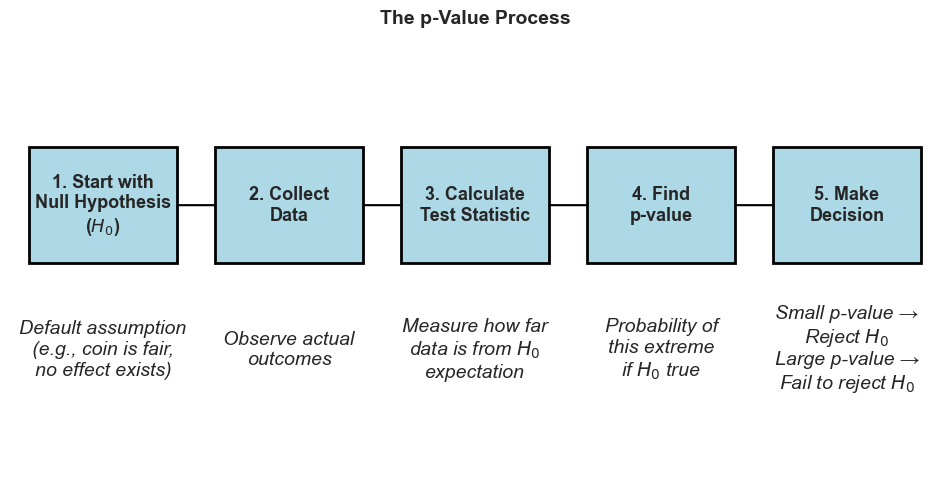

In [4]:
# Interactive demonstration of p-value concepts
print("🎯 KEY CONCEPT: The p-Value Answers One Question:\n")
print("┌─────────────────────────────────────────────────────────────────┐")
print("│  'Assuming the null hypothesis is true, what is the probability │")
print("│   of observing data at least as extreme as what we observed?'   │")
print("└─────────────────────────────────────────────────────────────────┘")

# Visual representation of the logic flow
fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('off')

# Create flow diagram
steps = [
    "1. Start with\nNull Hypothesis\n($H_0$)",
    "2. Collect\nData",
    "3. Calculate\nTest Statistic",
    "4. Find\np-value",
    "5. Make\nDecision"
]

descriptions = [
    "Default assumption\n(e.g., coin is fair,\nno effect exists)",
    "Observe actual\noutcomes",
    "Measure how far\ndata is from $H_0$\nexpectation",
    "Probability of\nthis extreme\nif $H_0$ true",
    "Small p-value →\nReject $H_0$\nLarge p-value →\nFail to reject $H_0$"
]

y_pos = 0.7
for i, (step, desc) in enumerate(zip(steps, descriptions)):
    x_pos = 0.1 + i * 0.2
    
    # Step box
    rect = plt.Rectangle((x_pos - 0.08, y_pos - 0.1), 0.16, 0.2, 
                         fill=True, facecolor='lightblue', edgecolor='black', linewidth=2)
    ax.add_patch(rect)
    ax.text(x_pos, y_pos, step, ha='center', va='center', fontsize=13, fontweight='bold')
    
    # Description
    ax.text(x_pos, y_pos - 0.25, desc, ha='center', va='center', fontsize=14, style='italic')
    
    # Arrow to next step
    if i < len(steps) - 1:
        ax.arrow(x_pos + 0.08, y_pos, 0.14, 0, head_width=0.03, head_length=0.02, fc='black')

ax.set_xlim(0, 1)
ax.set_ylim(0.2, 1)
ax.set_title('The p-Value Process', fontsize=14, fontweight='bold')
plt.show()

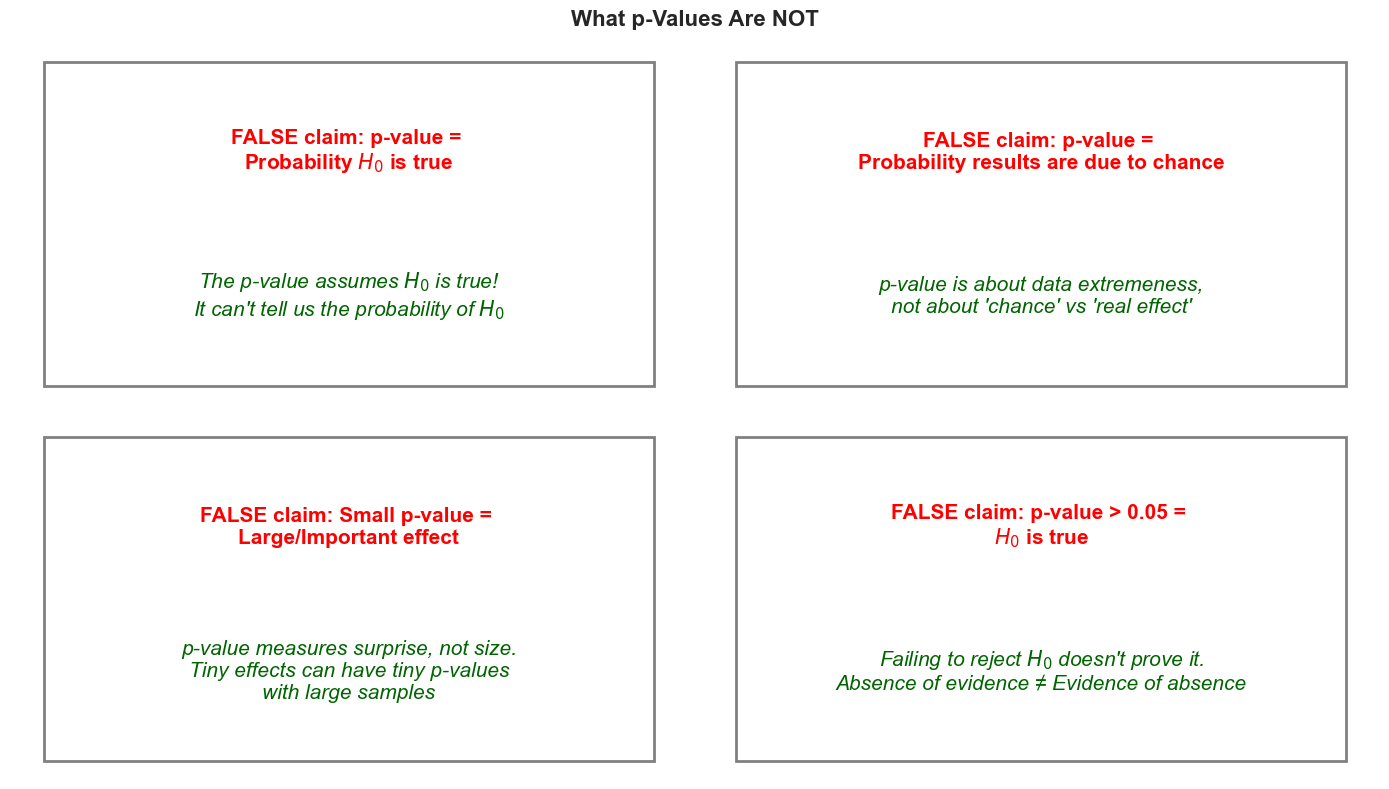

In [5]:
# Create a visual guide to what p-values are NOT
fig, axes = plt.subplots(2, 2, figsize=(14, 8))

misconceptions = [
    ("FALSE claim: p-value = \nProbability $H_0$ is true", 
     "The p-value assumes $H_0$ is true!\nIt can't tell us the probability of $H_0$"),
    ("FALSE claim: p-value = \nProbability results are due to chance", 
     "p-value is about data extremeness,\nnot about 'chance' vs 'real effect'"),
    ("FALSE claim: Small p-value = \nLarge/Important effect", 
     "p-value measures surprise, not size.\nTiny effects can have tiny p-values\nwith large samples"),
    ("FALSE claim: p-value > 0.05 = \n$H_0$ is true", 
     "Failing to reject $H_0$ doesn't prove it.\nAbsence of evidence ≠ Evidence of absence")
]

for ax, (misconception, truth) in zip(axes.flat, misconceptions):
    ax.text(0.5, 0.7, misconception, ha='center', va='center', 
            fontsize=15, fontweight='bold', color='red')
    ax.text(0.5, 0.3, truth, ha='center', va='center', 
            fontsize=15, style='italic', color='darkgreen')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')
    ax.add_patch(plt.Rectangle((0.05, 0.05), 0.9, 0.9, fill=False, 
                              edgecolor='gray', linewidth=2))

plt.suptitle('What p-Values Are NOT', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

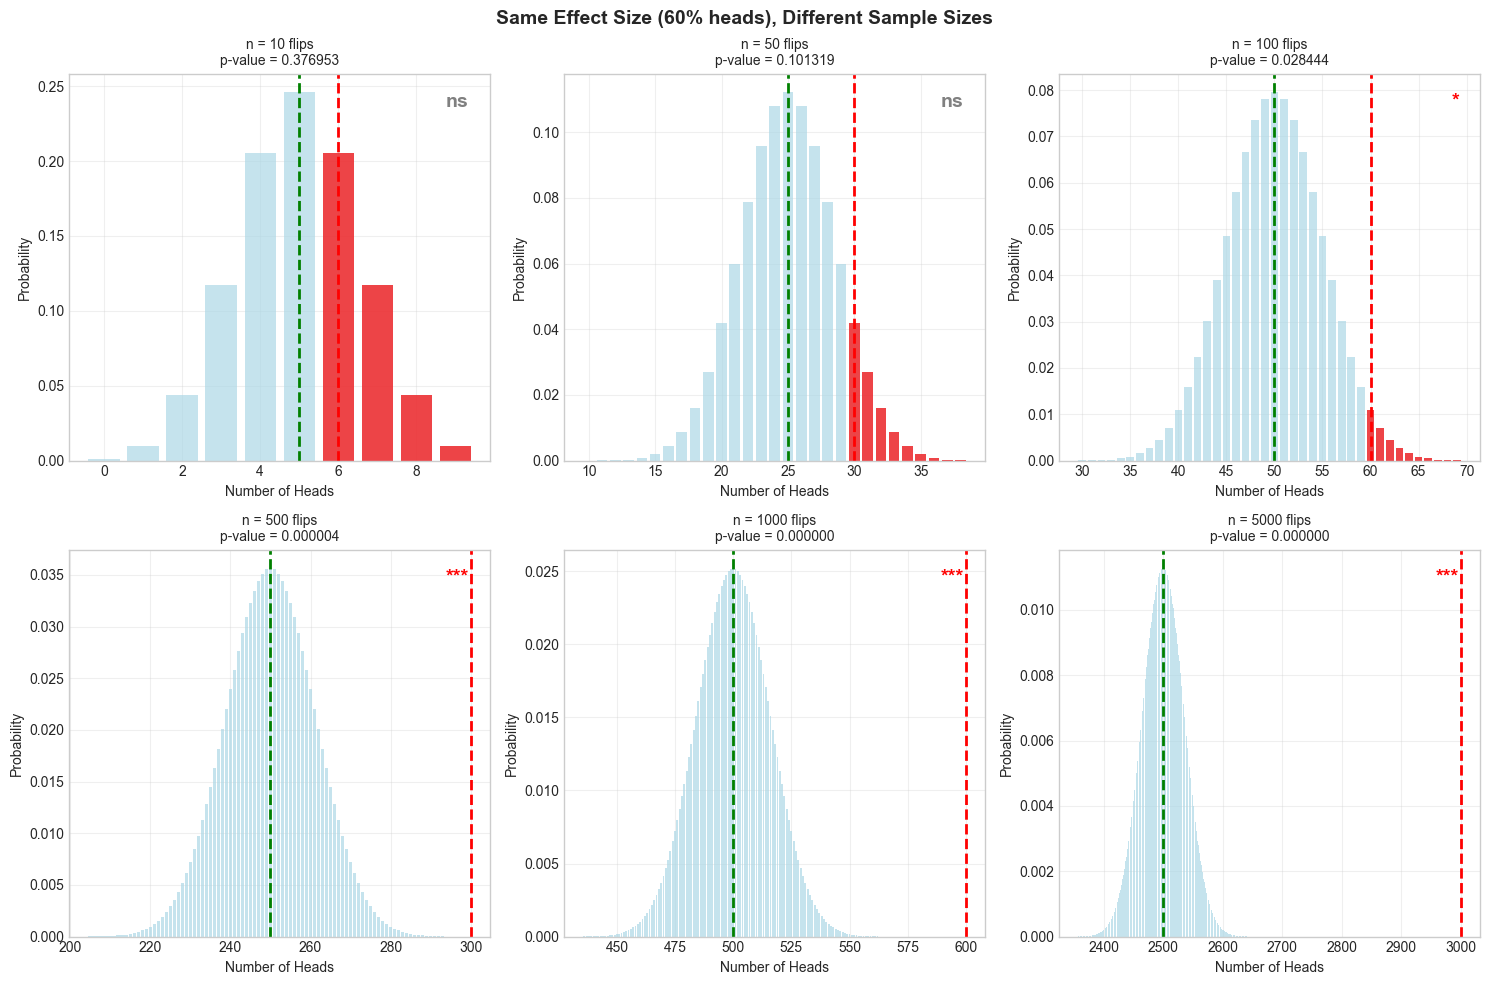

### 💡 Notice: The SAME unfairness (60% heads) gives different p-values depending on sample size!

With more data, we can detect smaller deviations from the null hypothesis.


In [6]:
# Demonstrate how sample size affects p-values
sample_sizes = [10, 50, 100, 500, 1000, 5000]
effect_size = 0.6  # True probability of heads (slightly unfair coin)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, n in enumerate(sample_sizes):
    ax = axes[idx]
    
    # Expected heads if fair vs actual
    expected_fair = n * 0.5
    expected_unfair = n * effect_size
    observed = int(expected_unfair)  # Simplified for demonstration
    
    # Calculate p-value
    p_val = 1 - stats.binom.cdf(observed - 1, n, 0.5)
    
    # Visualize
    x = np.arange(max(0, int(expected_fair - 4*np.sqrt(n*0.5*0.5))), 
                  min(n, int(expected_fair + 4*np.sqrt(n*0.5*0.5))))
    y = stats.binom.pmf(x, n, 0.5)
    
    ax.bar(x, y, color='lightblue', alpha=0.7)
    ax.bar(x[x >= observed], y[x >= observed], color='red', alpha=0.7)
    ax.axvline(expected_fair, color='green', linestyle='--', linewidth=2)
    ax.axvline(observed, color='red', linestyle='--', linewidth=2)
    
    ax.set_title(f'n = {n} flips\np-value = {p_val:.6f}', fontsize=10)
    ax.set_xlabel('Number of Heads')
    ax.set_ylabel('Probability')
    ax.grid(True, alpha=0.3)
    
    # Add significance marker
    if p_val < 0.001:
        significance = "***"
    elif p_val < 0.01:
        significance = "**"
    elif p_val < 0.05:
        significance = "*"
    else:
        significance = "ns"
    
    ax.text(0.95, 0.95, significance, transform=ax.transAxes, 
            fontsize=14, fontweight='bold', color='red' if significance != 'ns' else 'gray',
            ha='right', va='top')

plt.suptitle(f'Same Effect Size ({effect_size:.0%} heads), Different Sample Sizes', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print_insight("Notice: The SAME unfairness (60% heads) gives different p-values depending on sample size!")
print("With more data, we can detect smaller deviations from the null hypothesis.")

## The Business Context

You're a financial analyst investigating whether a company might be misclassified in its industry category. 
Companies are grouped by industry, and each industry has typical profit margin distributions. 
When a company's margins look unusual for its stated industry, it might indicate:

- Misclassification
- Exceptional performance
- Accounting irregularities
- Industry disruption

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import ipywidgets as widgets
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-whitegrid')
np.random.seed(42)

# Color palette for industries
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#6A994E', '#BC4B51']

In [8]:
df_company_industry = pd.read_pickle("data/df_train.pkl")
df_company_financials =  pd.read_pickle("data/df_financials_train.pkl")

Text(0.5, 1.0, 'Asset Turnover (Revenue / Total Assets)')

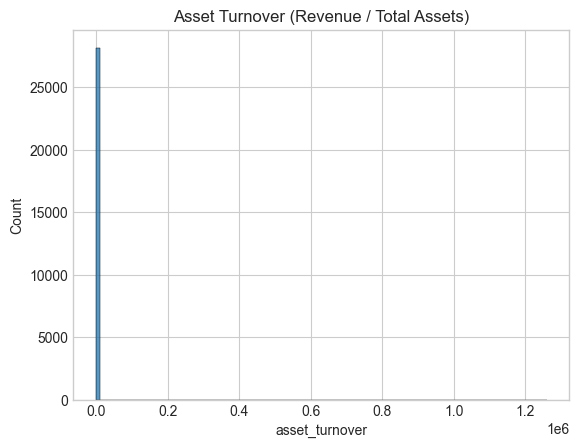

In [9]:
# merge data and clean

df = df_company_industry.merge(df_company_financials, on="id")

sns.histplot(df.asset_turnover, bins=100)
plt.title("Asset Turnover (Revenue / Total Assets)")

In [10]:
percentile_95 = df["asset_turnover"].quantile(0.95)

print("95s Percentile: ", percentile_95)
df = df[df.asset_turnover < percentile_95]
df = df[df.asset_turnover > 0]

95s Percentile:  1.8018310430448619


Text(0.5, 0, 'Asset Turnover')

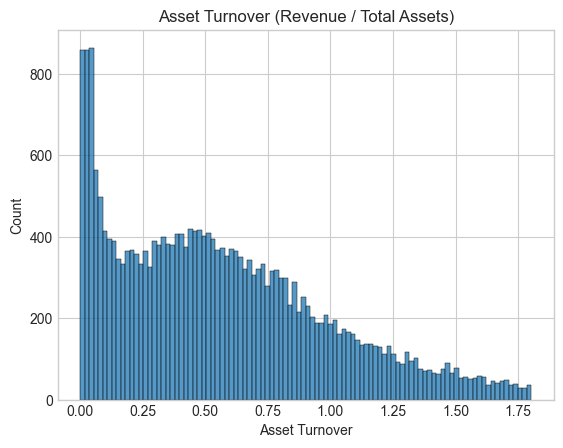

In [11]:
sns.histplot(df.asset_turnover, bins=100)
plt.title("Asset Turnover (Revenue / Total Assets)")
plt.xlabel("Asset Turnover")

Text(0.5, 1.0, 'Net Profit Margins')

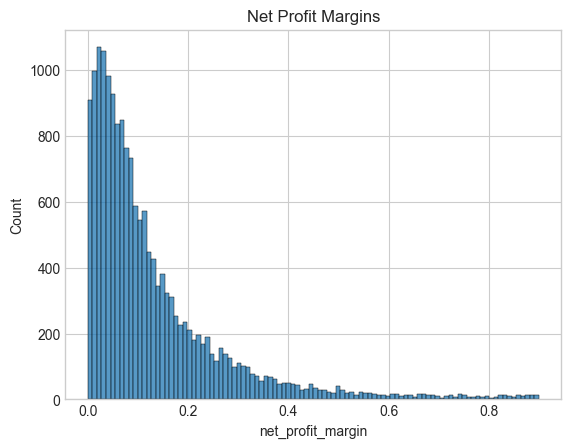

In [12]:
df_margins = df_company_industry.merge(df_company_financials, on="id")
df_margins = df_margins[df_margins.net_profit_margin < 0.9]
df_margins = df_margins[(~df_margins.net_profit_margin.isna()) & (df_margins.net_profit_margin >= 0)]
sns.histplot(df_margins.net_profit_margin, bins=100)
plt.title("Net Profit Margins")

## Log-normal distributions

Financial data is often times log-normal distributed. This means that the data roughly follows a normal distribution in log space.

This can be helpful if you want to model observed data as 

Text(0.5, 1.0, 'Distribution of log-profit margins')

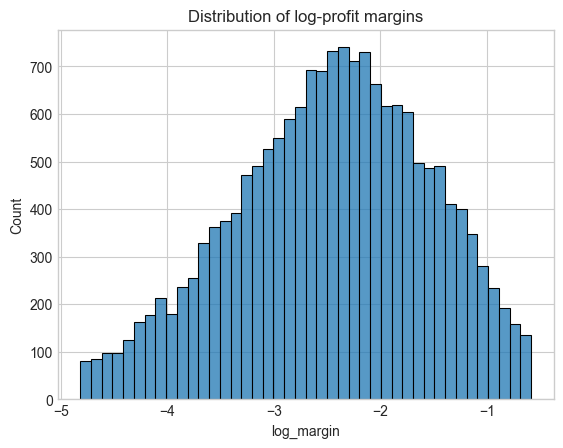

In [13]:
# handling outliers
df_margins = df_margins[(df_margins.net_profit_margin > 0) & (df_margins.net_profit_margin< 0.55)]
SHIFT =  0.008
df_margins["log_margin"] = np.log(df_margins["net_profit_margin"].values + SHIFT)
sns.histplot(df_margins.log_margin)
plt.title("Distribution of log-profit margins")

In [14]:
df_ind_stats = df.groupby("industry")["asset_turnover"].agg(["count", "mean", "std"], ).reset_index()
df_ind_stats = df_ind_stats[~df_ind_stats["std"].isna()]
df_ind_stats.to_csv("industry_rev_per_asset.csv")
df_ind_stats

,industry,count,mean,std
0,Automobiles & Components,549,0.806277,0.394972
1,Banks,866,0.050086,0.087624
2,Capital Goods,2696,0.657397,0.376228
3,Commercial & Professional Services,540,0.673462,0.441495
4,Consumer Discretionary Distribution & Retail,448,0.886146,0.468639
5,Consumer Durables & Apparel,982,0.754376,0.404543
6,Consumer Services,534,0.614537,0.422443
7,Consumer Staples Distribution & Retail,88,1.057864,0.479604
8,Energy,917,0.523974,0.406180
9,Equity Real Estate Investment Trusts (REITs),392,0.110329,0.098930


# Explore Industry Data

In [15]:
# Assuming your data is already loaded as df with columns: industry, margin
# First, compute industry statistics
df_ind_stats = df.groupby("industry")["asset_turnover"].agg(["count", "mean", "std"]).reset_index()
df_ind_stats = df_ind_stats[~df_ind_stats["std"].isna()]

# Display summary statistics
print(f"Total number of industries: {len(df_ind_stats)}")
print(f"Total number of companies: {df_ind_stats['count'].sum():.0f}")
print(f"\nIndustry Statistics Sample:")
print(df_ind_stats.head(10).to_string(index=False))

# Find industries with most extreme margins
print("\n📈 Industries with HIGHEST Asset Turnover:")
print(df_ind_stats.nlargest(5, 'mean')[['industry', 'mean', 'std']].to_string(index=False))

print("\n📉 Industries with LOWEST Asset Turnover:")
print(df_ind_stats.nsmallest(5, 'mean')[['industry', 'mean', 'std']].to_string(index=False))

Total number of industries: 25
Total number of companies: 24602

Industry Statistics Sample:
                                    industry  count     mean      std
                    Automobiles & Components    549 0.806277 0.394972
                                       Banks    866 0.050086 0.087624
                               Capital Goods   2696 0.657397 0.376228
          Commercial & Professional Services    540 0.673462 0.441495
Consumer Discretionary Distribution & Retail    448 0.886146 0.468639
                 Consumer Durables & Apparel    982 0.754376 0.404543
                           Consumer Services    534 0.614537 0.422443
      Consumer Staples Distribution & Retail     88 1.057864 0.479604
                                      Energy    917 0.523974 0.406180
Equity Real Estate Investment Trusts (REITs)    392 0.110329 0.098930

📈 Industries with HIGHEST Asset Turnover:
                                    industry     mean      std
      Consumer Staples Distribu

# Visualize Industry Distributions

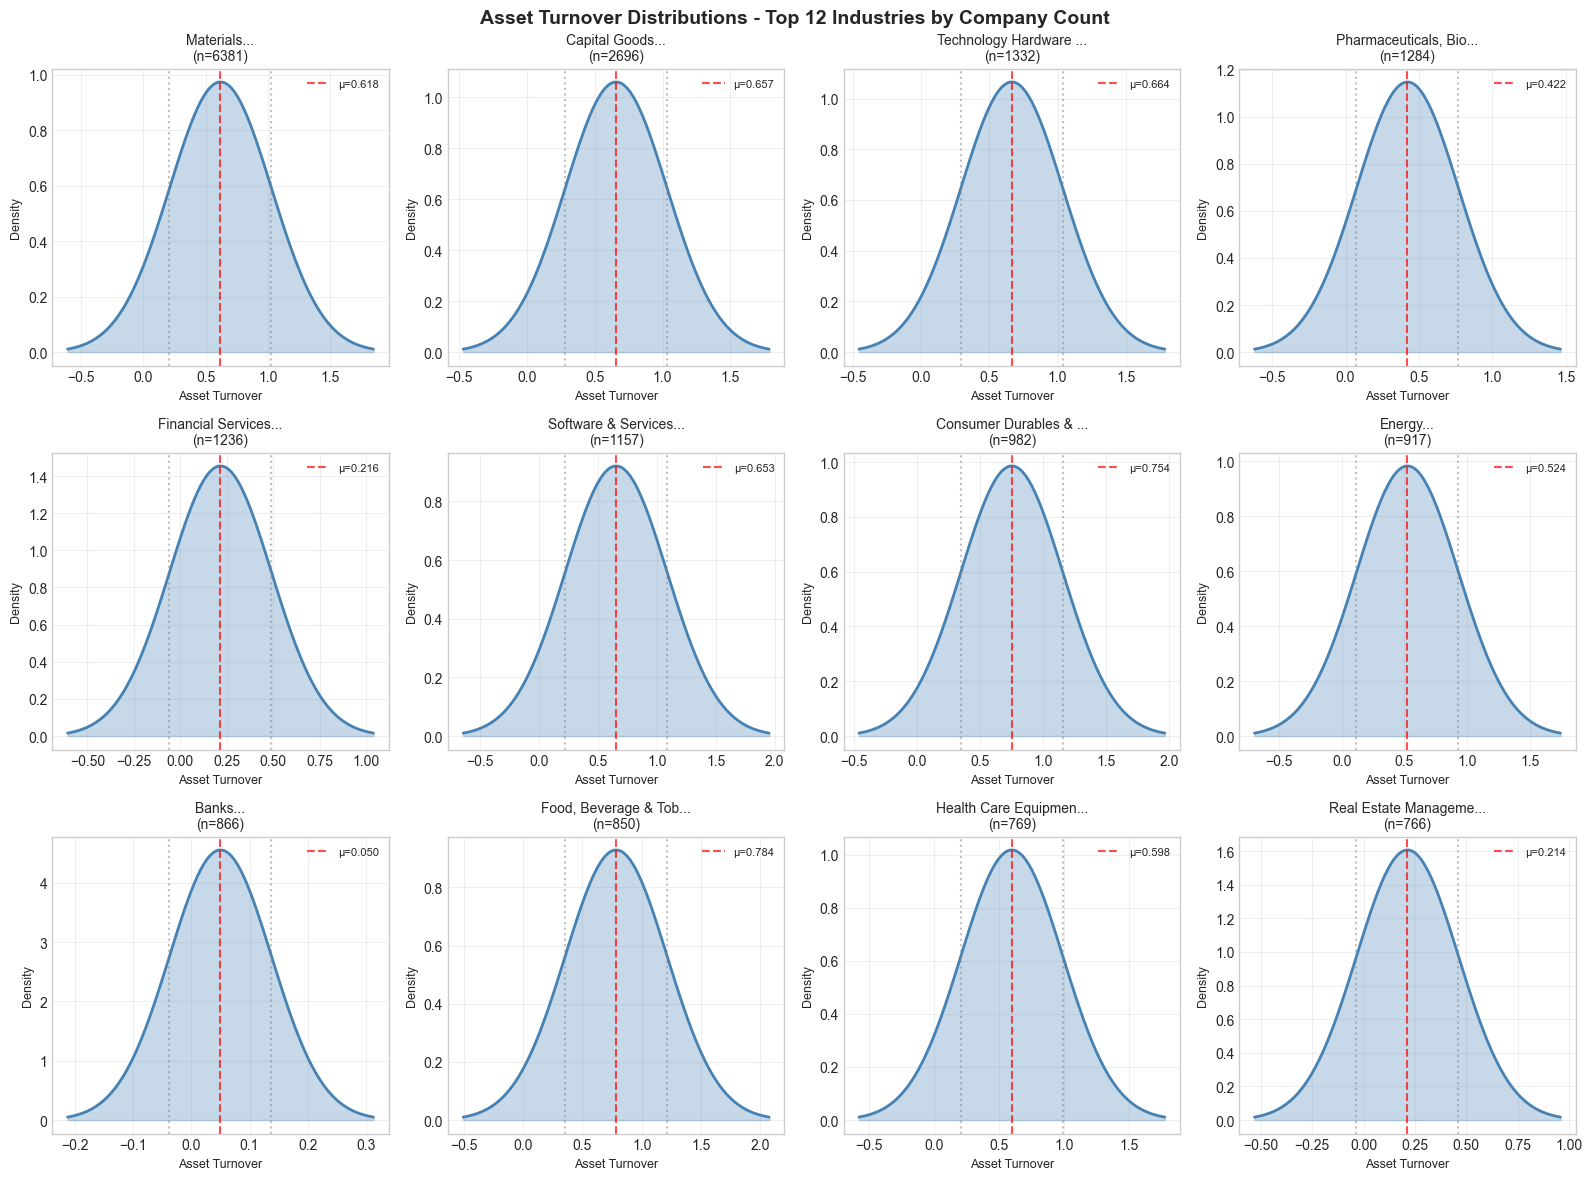

In [16]:
# Select top industries by company count for visualization
top_industries = df_ind_stats.nlargest(12, 'count')

fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.flatten()

for idx, (_, row) in enumerate(top_industries.iterrows()):
    ax = axes[idx]
    
    # Generate theoretical distribution based on stats
    x = np.linspace(row['mean'] - 3*row['std'], row['mean'] + 3*row['std'], 100)
    y = stats.norm.pdf(x, row['mean'], row['std'])
    
    ax.plot(x, y, linewidth=2, color='steelblue')
    ax.fill_between(x, y, alpha=0.3, color='steelblue')
    
    # Add vertical lines for mean and ±1 std
    ax.axvline(row['mean'], color='red', linestyle='--', alpha=0.7, label=f"μ={row['mean']:.3f}")
    ax.axvline(row['mean'] - row['std'], color='gray', linestyle=':', alpha=0.5)
    ax.axvline(row['mean'] + row['std'], color='gray', linestyle=':', alpha=0.5)
    
    ax.set_title(f"{row['industry'][:20]}...\n(n={row['count']:.0f})", fontsize=10)
    ax.set_xlabel('Asset Turnover', fontsize=9)
    ax.set_ylabel('Density', fontsize=9)
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3)

plt.suptitle('Asset Turnover Distributions - Top 12 Industries by Company Count', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Industry Comparison - Distribution Parameters

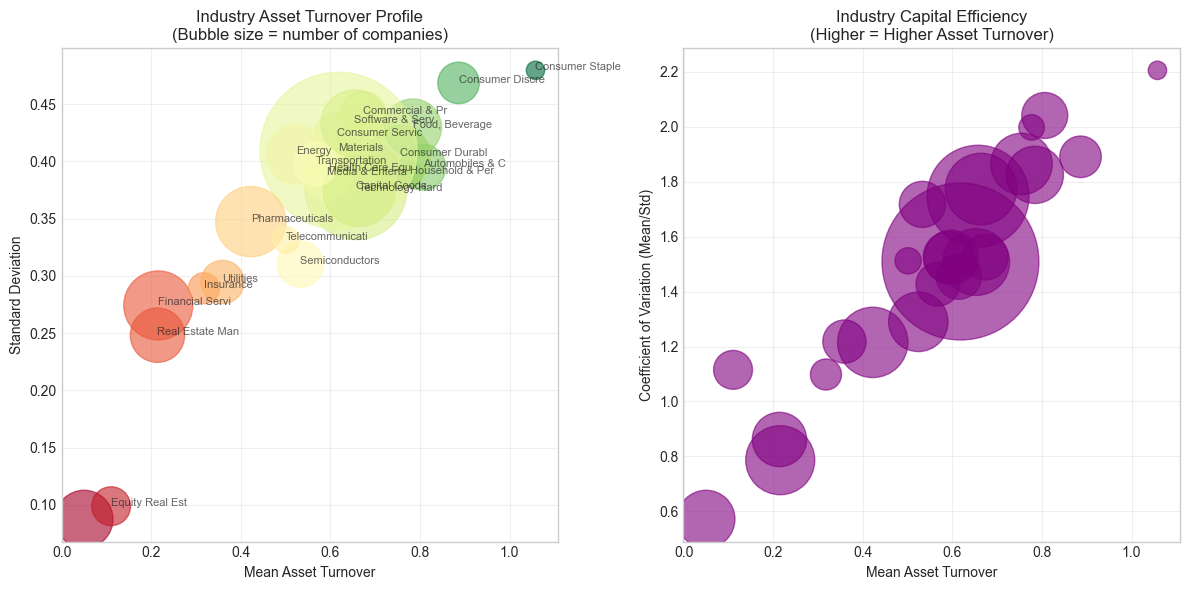

In [17]:
# Create a scatter plot of mean vs std to understand industry characteristics
plt.figure(figsize=(12, 6))

# Filter to industries with sufficient data
robust_industries = df_ind_stats[df_ind_stats['count'] >= 20]

plt.subplot(1, 2, 1)
scatter = plt.scatter(robust_industries['mean'], robust_industries['std'], 
                     s=robust_industries['count']*2, alpha=0.6, 
                     c=robust_industries['mean'], cmap='RdYlGn')
plt.xlabel('Mean Asset Turnover')
plt.ylabel('Standard Deviation')
plt.title('Industry Asset Turnover Profile\n(Bubble size = number of companies)')
#plt.colorbar(scatter, label='Mean Asset Turnover')
plt.grid(True, alpha=0.3)

# Add annotations for outlier industries
for _, row in robust_industries.iterrows():
    if row['std'] > robust_industries['std'].quantile(0.0) or row['mean'] > robust_industries['mean'].quantile(0.0):
        plt.annotate(row['industry'][:15], (row['mean'], row['std']), 
                    fontsize=8, alpha=0.7)

plt.subplot(1, 2, 2)
plt.scatter(robust_industries['mean'], robust_industries['mean']/robust_industries['std'],
           s=robust_industries['count']*2, alpha=0.6, color='purple')
plt.xlabel('Mean Asset Turnover')
plt.ylabel('Coefficient of Variation (Mean/Std)')
plt.title('Industry Capital Efficiency\n(Higher = Higher Asset Turnover)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# The p-Value Investigation - Testing a Specific Company

In [18]:
def test_company_classification(rev_per_asset, claimed_industry, df_stats):
    """Test if a company's margin is consistent with its claimed industry"""
    industry_row = df_stats[df_stats['industry'] == claimed_industry]
    
    if industry_row.empty:
        return None
    
    industry_mean = industry_row['mean'].values[0]
    industry_std = industry_row['std'].values[0]
    industry_count = industry_row['count'].values[0]
    
    # Use population standard deviation, not standard error!
    z_score = (rev_per_asset - industry_mean) / industry_std
    
    # This tells you: "What percentile is this company in?"
    percentile = stats.norm.cdf(z_score)
    
    # Two-tailed p-value based on position in distribution
    p_value = 2 * min(percentile, 1 - percentile)
    
    return {
        'industry': claimed_industry,
        'industry_mean': industry_mean,
        'industry_std': industry_std,
        'rev_per_asset': rev_per_asset,
        'z_score': z_score,
        'percentile': percentile * 100,
        'p_value': p_value,
        'deviation_pct': ((rev_per_asset / industry_mean) - 1) * 100
    }

# Example: Test a suspicious company
test_cases = [
    {'rev_per_asset': 0.8, 'industry': 'Financial Services'},  
    {'rev_per_asset': 0.02, 'industry': 'Banks'},
    {'rev_per_asset': 0.32, 'industry': 'Consumer Staples Distribution & Retail'}
]

print("🔍 Company Classification Tests:\n")
for test in test_cases:
    result = test_company_classification(test['rev_per_asset'], test['industry'], df_ind_stats)
    if result:
        print(f"Company with {result['rev_per_asset']:.3f} Asset Turnover supposed to be in {result['industry']}:")
        print(f"  Industry mean: {result['industry_mean']:.3f} (σ = {result['industry_std']:.3f})")
        print(f"  Z-score: {result['z_score']:.3f}")
        print(f"  P-value: {result['p_value']:.6f}")
        
        if result['p_value'] < 0.01:
            print("🚨 Unlikely: Very likely to be misclassified!\n")
        elif result['p_value'] < 0.05:
            print("⚠️ Suspicious: Likely misclassified\n")
        elif result['p_value'] < 0.15:
            print("🤔 Should be investigated: Possibly misclassified\n")
        else:
            print("✅ Plausible: Classification seems reasonable\n")

🔍 Company Classification Tests:

Company with 0.800 Asset Turnover supposed to be in Financial Services:
  Industry mean: 0.216 (σ = 0.274)
  Z-score: 2.130
  P-value: 0.033140
⚠️ Suspicious: Likely misclassified

Company with 0.020 Asset Turnover supposed to be in Banks:
  Industry mean: 0.050 (σ = 0.088)
  Z-score: -0.343
  P-value: 0.731336
✅ Plausible: Classification seems reasonable

Company with 0.320 Asset Turnover supposed to be in Consumer Staples Distribution & Retail:
  Industry mean: 1.058 (σ = 0.480)
  Z-score: -1.538
  P-value: 0.123930
🤔 Should be investigated: Possibly misclassified

